In [ ]:
'''Imagine you are working as a Data Analyst in an investment firm. Your manager has asked you to analyze the stock
performance of ABC Corporation over the past year. The firm is considering whether to increase its investment in this company.

You are analyzing the stock prices of a company over the past year. The dataset contains daily closing prices.(
https://www.kaggle.com/datasets/shenba/time-series-datasets)
During the year, several key events occurred that could have impacted the stock price:
• Quarterly earnings reports released in March, June, September, and December.
• A stock split that took place in July.
• A major product launch in October.
As part of your analysis, your manager expects you to:
1. Visualize the Stock Performance
o Create a time series plot of daily closing prices over the year.
o Add gridlines to improve readability.
o Annotate the chart with key events such as earnings reports, the stock split, and the product launch.
2. Enhance Interpretation
o Provide a clear title to the plot, such as “ABC Corporation Daily Closing Prices – Yearly Trend”.
o Label the x-axis as “Date” and the y-axis as “Closing Price (USD)”.
o Use appropriate formatting (e.g., rotated date ticks) to make the plot easy to interpret'''

In [1]:
import pandas as pd
import numpy as np

dates = pd.date_range(start='2024-08-26', end='2025-08-26', freq='B')

np.random.seed(42)
base_price = 50
daily_changes = np.random.normal(loc=0, scale=1.5, size=len(dates))
prices = base_price + np.cumsum(daily_changes)

df = pd.DataFrame({
    'Date': dates,
    'Close': prices
})

events = {
    '2025-03-31': 3,
    '2025-06-30': 4,
    '2025-07-15': 10,
    '2025-09-30': 4,
    '2025-10-10': 8,
    '2025-12-31': 5
}

for date, impact in events.items():
    event_date = pd.to_datetime(date)
    if event_date in df['Date'].values:
        df.loc[df['Date'] == event_date, 'Close'] += impact

df.to_csv('abc_corporation_stock_data.csv', index=False)
print("Dataset created: 'abc_corporation_stock_data.csv'")

Dataset created: 'abc_corporation_stock_data.csv'


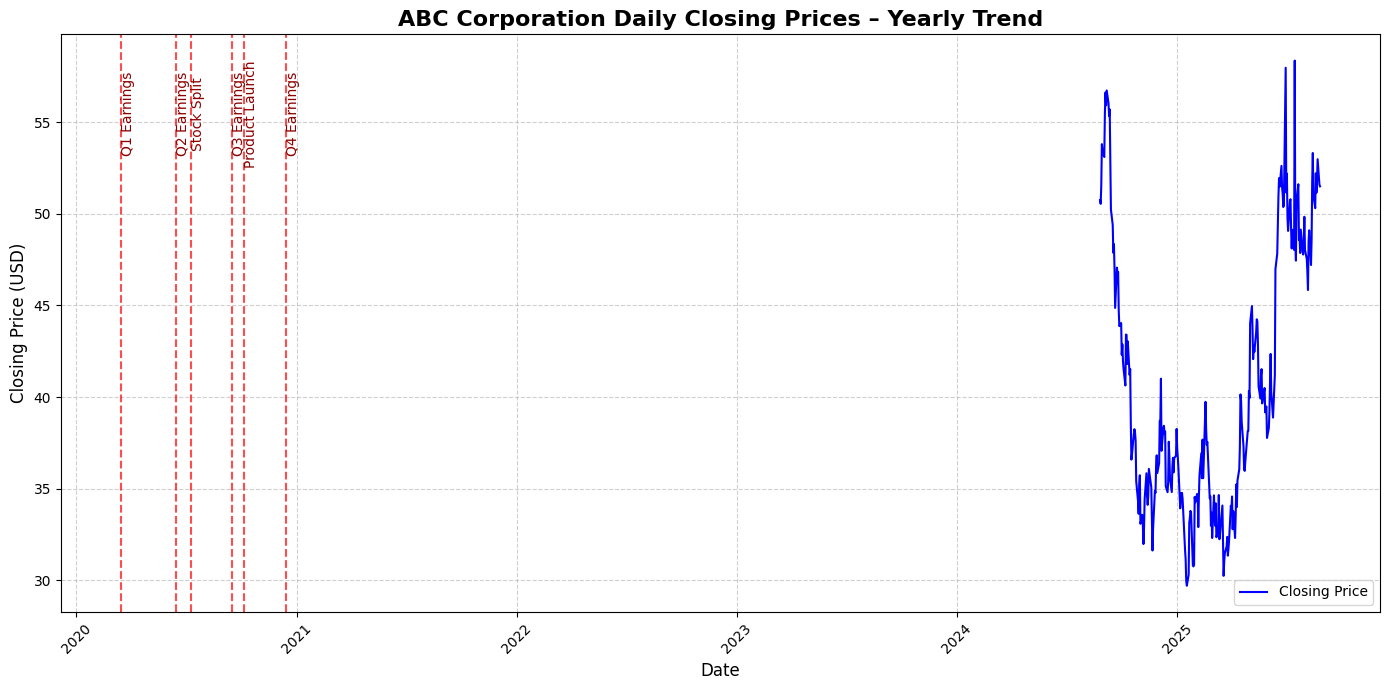

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("abc_corporation_stock_data.csv")  # Replace with actual filename from Kaggle
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Extract only Closing Price column (assume it's named 'Close')
df = df[['Date', 'Close']]

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label="Closing Price", color="blue")

# Add gridlines
plt.grid(True, linestyle="--", alpha=0.6)

# Annotate key events
events = {
    "2020-03-15": "Q1 Earnings",
    "2020-06-15": "Q2 Earnings",
    "2020-07-10": "Stock Split",
    "2020-09-15": "Q3 Earnings",
    "2020-10-05": "Product Launch",
    "2020-12-15": "Q4 Earnings"
}

for date, label in events.items():
    plt.axvline(pd.to_datetime(date), color="red", linestyle="--", alpha=0.7)
    plt.text(pd.to_datetime(date), df['Close'].max()*0.95, label,
             rotation=90, verticalalignment='center', color="darkred")

# Labels and Title
plt.title("ABC Corporation Daily Closing Prices – Yearly Trend", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price (USD)", fontsize=12)
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()
